In [1]:
import sys
sys.path.append("../../XLEMOO")

In [106]:
from XLEMOO.LEMOO import EAParams, MLParams, LEMParams, LEMOO
from XLEMOO.fitness_indicators import naive_sum, must_sum_to_one, asf_wrapper
from XLEMOO.tree_interpreter import instantiate_tree_rules, find_all_paths
from desdeo_emo.recombination import SBX_xover, BP_mutation
from desdeo_emo.selection import TournamentSelection
from desdeo_problem.testproblems import test_problem_builder
from desdeo_tools.scalarization.ASF import SimpleASF, GuessASF

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt
import numpy as np
from imodels import C45TreeClassifier

## Define problem

In [107]:
n_objectives = 3
n_variables = 4
problem = test_problem_builder("DTLZ7", n_variables, n_objectives)

## Setting model parameters

In [112]:
ref_point = np.zeros(n_objectives)
fitness_fun = asf_wrapper(GuessASF(np.ones(n_objectives)), {"reference_point": ref_point})

lem_params = LEMParams(
    n_total_iterations=10,
    n_ea_gen_per_iter=10,
    n_ml_gen_per_iter=1,
    use_ea=True,
    use_ml=True,
    fitness_indicator=fitness_fun
)

ea_params = EAParams(
    population_size=50,
    cross_over_op=SBX_xover(),
    mutation_op=BP_mutation(problem.get_variable_lower_bounds(), problem.get_variable_upper_bounds()),
    selection_op=TournamentSelection(None, tournament_size=2),
    population_init_design="RandomDesign"
)

# ml = DecisionTreeClassifier(random_state=0)
ml = DecisionTreeClassifier()
ml_params = MLParams(
    H_split=0.3,
    L_split=0.3,
    ml_model=ml,
    ml_fitness=fitness_fun
)

## Setup LEMOO model

In [113]:
lemoo = LEMOO(problem, lem_params, ea_params, ml_params)

In [114]:
lemoo.reset_population()
history = lemoo.run()

starting learning mode
starting learning mode
starting learning mode
starting learning mode
starting learning mode
starting learning mode
starting learning mode
starting learning mode
starting learning mode
starting learning mode


In [115]:
def plot_mean_fitness(population, fitness_fun):
    fitness = np.squeeze([fitness_fun(p) for p in population])
    means = np.mean(fitness, axis=1)
    plt.plot(np.arange(means.shape[0]), means)
    
def plot_best_fitness(population, fitness_fun):
    fitness = np.squeeze([fitness_fun(p) for p in population])
    mins = np.min(fitness, axis=1)
    plt.plot(np.arange(mins.shape[0]), mins)

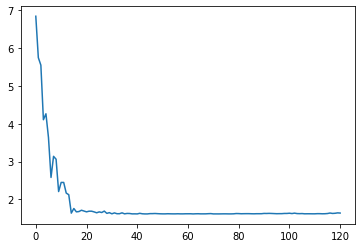

In [116]:
plot_best_fitness(history, fitness_fun)

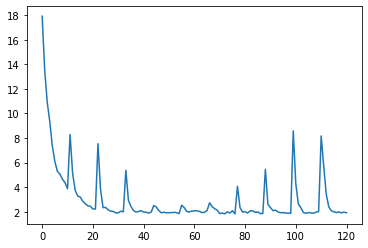

In [117]:
plot_mean_fitness(history, fitness_fun)

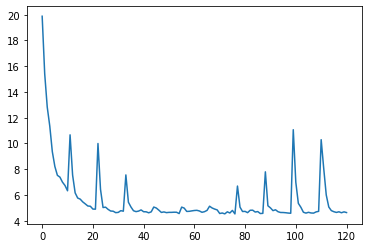

In [118]:
plot_mean_fitness(history, naive_sum)

{'rules': [[3, 'lte', 0.0007421687769237906], [1, 'lte', 0.9161579012870789], [0, 'lte', 0.8963629305362701]], 'samples': 14.0, 'impurity': 0.0, 'classification': 1}
{'rules': [[3, 'lte', 0.0007421687769237906], [1, 'lte', 0.9161579012870789], [0, 'gt', 0.8963629305362701]], 'samples': 1.0, 'impurity': 0.0, 'classification': -1}
{'rules': [[3, 'lte', 0.0007421687769237906], [1, 'gt', 0.9161579012870789]], 'samples': 3.0, 'impurity': 0.0, 'classification': -1}
{'rules': [[3, 'gt', 0.0007421687769237906], [2, 'lte', 0.00168835066142492]], 'samples': 10.0, 'impurity': 0.0, 'classification': -1}
{'rules': [[3, 'gt', 0.0007421687769237906], [2, 'gt', 0.00168835066142492], [3, 'lte', 0.00141204270767048]], 'samples': 1.0, 'impurity': 0.0, 'classification': -1}
{'rules': [[3, 'gt', 0.0007421687769237906], [2, 'gt', 0.00168835066142492], [3, 'gt', 0.00141204270767048]], 'samples': 1.0, 'impurity': 0.0, 'classification': 1}


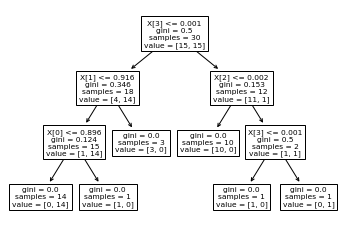

In [105]:
tree.plot_tree(lemoo.current_ml_model);
paths = find_all_paths(lemoo.current_ml_model)
for p in paths:
    print(p)